In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utilities import gender_func

# Reading in the data into variable named df

In [155]:
df = pd.read_csv('globalcount_data.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 92 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [186]:
def race_func(y):
    race = []
    if y['white']:
        race.append('white')
    if y['asian']:
        race.append('asian')
    if y['south_asian']:
        race.append('south_asian')
    if y['southeast_asian']:
        race.append('southeast_asian')
    if y['pacific_islander']:
        race.append('pacific_islander')
    if y['north_african']:
        race.append('north_african')
    if y['native_hawaiian']:
        race.append('native_hawaiian')
    if y['native_american']:
        race.append('native_american')
    if y['middle_eastern']:
        race.append('middle_eastern')
    if y['indigenous_central_or_south_american']:
        race.append('indigenous_central_or_south_american')
    if y['indigenous']:
        race.append('indigenous')
    if y['choose_not_to_identify']:
        race.append('choose_not_to_identify')
    if y['hispanic_or_latinx']:
        race.append('hispanic_or_latinx')
    if y['black_or_of_african_descent']:
        race.append('black_or_of_african_descent')
    if y['biracial_or_mixed']:
        race.append('biracial_or_mixed')
    if y['racial_identity_not_listed']:
        race.append('racial_identity_not_listed')
    if race == []:
        race.append('undisclosed')
    
    if len(race) > 1:
        return 'multi-racial'
    return ', '.join(race)

In [187]:
df['race'] = df.apply(race_func, axis = 1)

In [131]:
# melting genders into one column using my gender_func

df['gender_list'] = df.apply(gender_func, axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 94 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [11]:
df_test = df.iloc[:,[34,38]]

In [17]:
df_c =  pd.crosstab(df_test.iloc[:,0], df_test.iloc[:,1], margins = True)

In [18]:
df_c

issue_person_ending_violence_harassment_and_abuse,0,1,All
issue_person_civil_rights_and_freedoms,,,
0,5725,11279,17004
1,3127,3920,7047
All,8852,15199,24051


In [23]:
df.count()

row_id                  24051
unique_id               24051
survey_type             24051
iso3166                 24046
surveydate              24051
                        ...  
progress_10_years_tr    11426
language                12954
langauge_score          12954
race                    24051
gender_list             24051
Length: 94, dtype: int64

In [21]:
df_test = df.iloc[:,[44,35]]
df_c =  pd.crosstab(df_test.iloc[:,0], df_test.iloc[:,1], margins = True)

In [22]:
df_c

issue_person_disability_rights,0,1,All
issue_person_reproductive_freedom_and_bodily_autonomy,,,
0,19231,2403,21634
1,2326,91,2417
All,21557,2494,24051


# IMPORTANT, REMEMBER
There are two types of issues in the dataset

One is issue_city which deals with local issues

The other is issue_person which applies globally/personally

In [128]:
issues_global = df.columns[34:46]

In [129]:
issues_local = df.columns[58:70]

In [130]:
issues_all = issues_global.append(issues_local)

# Turning wide data into long data

In [188]:
df_long = df.melt(id_vars = [c for c in df.columns if c not in issues_global], var_name = 'issue')

In [24]:
df_long = df.melt(id_vars = [c for c in df.columns if c not in issues_all], var_name = 'issue')

In [31]:
df_long.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,...,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score,issue,value
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,issue_person_civil_rights_and_freedoms,0
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,NaN,NaN,On,on,ON,NaN,pl,1.00,issue_person_civil_rights_and_freedoms,0
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,issue_person_civil_rights_and_freedoms,0
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,...,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97,issue_person_civil_rights_and_freedoms,0
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,...,NaN,More women in high political positions. Access...,SINGA,SINGA,NaN,More women in high political positions. Access...,en,1.00,issue_person_civil_rights_and_freedoms,0


# Example 1
Let's say I want to check the distribution of issue importance according to country_of_residence

In [56]:
df[(df['issue_person_racial_equity'] == 1) & (df['issue_person_economic_and_workers_rights'] == 1)].count()/df.count()[0] * 100

row_id                  2.145441
unique_id               2.145441
survey_type             2.145441
iso3166                 2.145441
surveydate              2.145441
                          ...   
npo_2_tr                0.814935
npo_3_tr                0.698516
progress_10_years_tr    1.151719
language                1.318033
langauge_score          1.318033
Length: 92, dtype: float64

In [49]:
df[df['country_of_residence'] == 'Switzerland']['age'].value_counts()

55 to 64       313
35 to 44       230
45 to 54       229
25 to 34       227
65 to 74       213
18 to 24       166
75 or older     65
Name: age, dtype: int64

In [147]:
df

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,...,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,...,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,...,SINGA,SINGA,NaN,More women in high political positions. Access...,SINGA,SINGA,NaN,More women in high political positions. Access...,en,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24046,31619,12744852388,medium,CH,6/15/2021 16:15,Zurich,Zurich,Switzerland,0,0,...,Klimastreik,Womens March,Frauenstreik,"Equal pay, more support when it comes to child...",Klimastreik,Womens March,Frauenstreik,"Equal pay, more support when it comes to child...",en,1.00
24047,31620,12747504277,long,RU,6/16/2021 10:19,Рязань,Ryazan,Russian Federation,0,0,...,Не знаю,NaN,NaN,"Когда в некоторых странах будет равноправие, а...",I don'`t know,NaN,NaN,When there is equality in some countries and n...,ru,1.00
24048,31621,12747787758,medium,CH,6/16/2021 12:15,Zürich,Zrich,Switzerland,0,0,...,Amnesty International,Amnesty Switzerland,SP Schweiz,Equality,Amnesty International,Amnesty Switzerland,SP Schweiz,Equality,en,1.00
24049,31622,12749421162,medium,CH,6/16/2021 21:49,Winterthur,Winterthur,Switzerland,0,0,...,NaN,NaN,NaN,Schleppend,NaN,NaN,NaN,Dragging,de,1.00


In [154]:
df['issue_person_civil_rights_and_freedoms'].sum()/df.count()['issue_person_civil_rights_and_freedoms']

0.2930023699638269

In [151]:
df.count()['issue_person_ending_violence_harassment_and_abuse']

24051

In [37]:
df_analysis = df_long[['country_of_residence', 'issue', 'value']]
df_analysis.groupby(['country_of_residence', 'issue']).sum().sort_values(by = 'value', ascending = False)

value
country_of_residence issue                                                    
Switzerland          issue_person_ending_violence_harassment_and_abuse    1518
                     issue_person_racial_equity                           1398
Belarus              issue_person_civil_rights_and_freedoms               1384
Switzerland          issue_person_environmental_justice                   1367
Belarus              issue_person_ending_violence_harassment_and_abuse    1330
...                                                                        ...
Malta                issue_person_indigenous_andor_roma_rights               0
                     issue_person_reproductive_freedom_and_bodily_au...      0
Mauritius            issue_person_LGBTQI+_rights                             0
                     issue_person_disability_rights                          0
Kuwait               issue_person_environmental_justice                      0

[1860 rows x 1 columns]

In [249]:
df_analysis = df_long[['race', 'issue', 'value']]
d = df_analysis.groupby(['race', 'issue']).sum().groupby('race').get_group('white').sort_values(by = 'value', ascending = False).reset_index().iloc[:,1:]

In [250]:
d

,issue,value
0,issue_person_ending_violence_harassment_and_abuse,3412
1,issue_person_civil_rights_and_freedoms,2563
2,issue_person_environmental_justice,1920
3,issue_person_education_and_youth_empowerment,1485
4,issue_person_economic_and_workers_rights,1264
5,issue_person_racial_equity,1209
6,issue_person_reproductive_freedom_and_bodily_a...,1037
7,issue_person_LGBTQI+_rights,934
8,issue_person_sexual_reproductive_and_parental_...,896
9,issue_person_disability_rights,575


In [251]:
d['ISSUE'] = ['Violence Harassment and Abuse', 'Civil rights and freedom','Environmental Justice',  'Education and Youth empowerment', 'Economic and worker rights','Racial equity',  'Reproductive freedom and bodily autonomy', 'LGBTQI+ rights', 'Sexual reproductive and parental health', 'Disability right', 'Immigrant and refugee rights', 'Indigenous and/or Roma rights']

<AxesSubplot:xlabel='value', ylabel='ISSUE'>

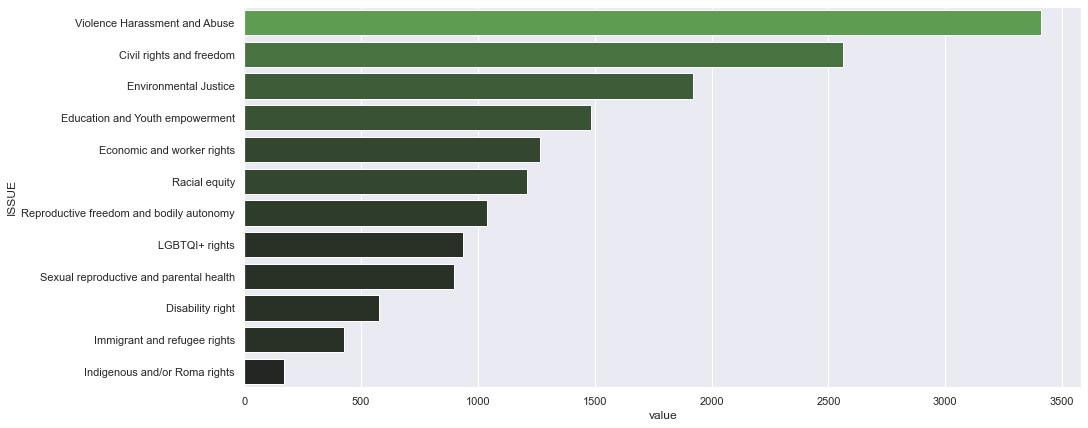

In [252]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = d, y = 'ISSUE', x = 'value', palette = c)

In [163]:
742/df[df['race'] == 'black_or_of_african_descent'].count()[0]

0.16286215978928886

In [170]:
df[df['race'] == 'black_or_of_african_descent']['country_of_residence'].value_counts()[:10].to_frame('count')

,count
Zimbabwe,685
Liberia,567
Kenya,564
Uganda,527
Nigeria,477
Zambia,345
Cameroon,342
Botswana,208
South Africa,142
Angola,98


In [210]:
df[df['race'] == 'middle_eastern']['country_of_residence'].value_counts()[:10]

Libya                       29
Afghanistan                 20
India                       10
Nepal                        9
Lebanon                      7
Canada                       7
Nigeria                      5
Switzerland                  5
Saudi Arabia                 5
United States of America     4
Name: country_of_residence, dtype: int64

[Text(0, 0, 'Libya'),
 Text(1, 0, 'Afghanistan'),
 Text(2, 0, 'India'),
 Text(3, 0, 'Nepal'),
 Text(4, 0, 'Lebanon'),
 Text(5, 0, 'Canada'),
 Text(6, 0, 'Nigeria'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Saudi Arabia'),
 Text(9, 0, 'United States of America')]

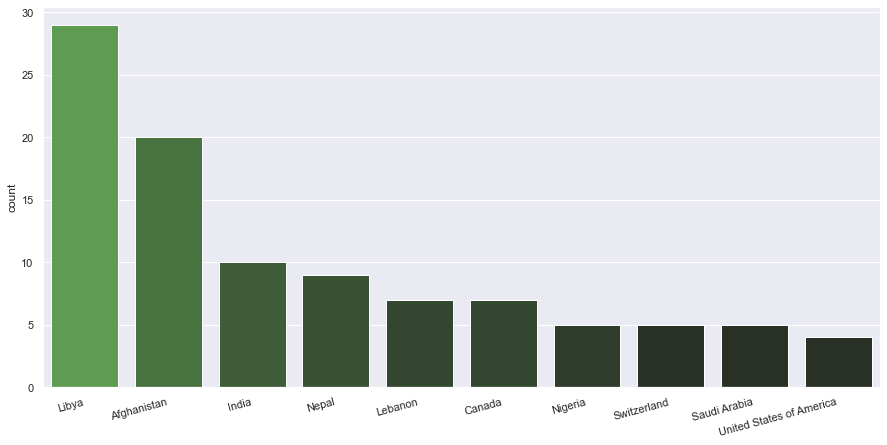

In [254]:
sns.set(rc={'figure.figsize':(15,7)})
s = sns.barplot(data = df[df['race'] == 'middle_eastern']['country_of_residence'].value_counts()[:10].to_frame('count'), y = 'count', x = df[df['race'] == 'middle_eastern']['country_of_residence'].value_counts()[:10].to_frame('count').index, palette = c)
s.set_xticklabels(labels =  df[df['race'] == 'middle_eastern']['country_of_residence'].value_counts()[:10].to_frame('count').index,rotation = 15, ha = 'right')

In [185]:
df_analysis = df_long[['race', 'issue', 'value']]
df_analysis.groupby(['race', 'issue']).sum().groupby('race').sum().index

Index(['asian', 'asian, biracial_or_mixed',
       'asian, biracial_or_mixed, racial_identity_not_listed',
       'asian, black_or_of_african_descent',
       'asian, black_or_of_african_descent, biracial_or_mixed',
       'asian, hispanic_or_latinx',
       'asian, hispanic_or_latinx, biracial_or_mixed',
       'asian, hispanic_or_latinx, black_or_of_african_descent',
       'asian, hispanic_or_latinx, black_or_of_african_descent, biracial_or_mixed',
       'asian, indigenous',
       ...
       'white, racial_identity_not_listed', 'white, south_asian',
       'white, south_asian, indigenous, biracial_or_mixed',
       'white, south_asian, indigenous_central_or_south_american',
       'white, south_asian, southeast_asian, pacific_islander, north_african, native_hawaiian, native_american, middle_eastern, indigenous_central_or_south_american, indigenous, hispanic_or_latinx',
       'white, southeast_asian',
       'white, southeast_asian, biracial_or_mixed, racial_identity_not_listed',


# Example 1 Continued
Now, I want to check out the stats for Canada regarding immigrant and refugee rights

In [13]:
# 35 people from Canada chose Immigrant Rights as an important issue
# focus on the value returned

df_analysis.groupby(['country_of_residence', 'issue']).get_group(('Canada', 'issue_person_immigrant_and_refugee_rights')).sum()

country_of_residence    CanadaCanadaCanadaCanadaCanadaCanadaCanadaCana...
issue                   issue_person_immigrant_and_refugee_rightsissue...
value                                                                  35
dtype: object

# What if I want to check out stats for all issues for a country?
Lets check out the stats for Myanmar

In [14]:
# code is a bit involved
# but all you have to do is change the country in the last get_group()

df_analysis.groupby(['country_of_residence', 'issue']).sum().groupby('country_of_residence').get_group('Myanmar')

value
country_of_residence issue                                                    
Myanmar              issue_city_LGBTQI+_rights                               1
                     issue_city_civil_rights_and_freedoms                    0
                     issue_city_disability_rights                            0
                     issue_city_economic_and_workers_rights                  0
                     issue_city_education_and_youth_empowerment              0
                     issue_city_ending_violence_harassment_and_abuse         1
                     issue_city_environmental_justice                        0
                     issue_city_immigrant_and_refugee_rights                 0
                     issue_city_indigenous_andor_roma_rights                 0
                     issue_city_racial_equity                                0
                     issue_city_reproductive_freedom_and_bodily_auto...      1
                     issue_city_sexual_reproductive_and_parental_health      0
                     issue_person_LGBTQI+_rights                             0
                     issue_person_civil_rights_and_freedoms                  0
                     issue_person_disability_rights                          0
                     issue_person_economic_and_workers_rights                0
                     issue_person_education_and_youth_empowerment            2
                     issue_person_ending_violence_harassment_and_abuse       2
                     issue_person_environmental_justice                      0
                     issue_person_immigrant_and_refugee_rights               0
                     issue_person_indigenous_andor_roma_rights               0
                     issue_person_racial_equity                              0
                     issue_person_reproductive_freedom_and_bodily_au...      1
                     issue_person_sexual_reproductive_and_parental_h...      1

In [15]:
df_analysis.groupby(['country_of_residence', 'issue']).sum().groupby('country_of_residence').get_group('Oman')

value
country_of_residence issue                                                    
Oman                 issue_city_LGBTQI+_rights                               0
                     issue_city_civil_rights_and_freedoms                    0
                     issue_city_disability_rights                            0
                     issue_city_economic_and_workers_rights                  1
                     issue_city_education_and_youth_empowerment              0
                     issue_city_ending_violence_harassment_and_abuse         0
                     issue_city_environmental_justice                        0
                     issue_city_immigrant_and_refugee_rights                 1
                     issue_city_indigenous_andor_roma_rights                 0
                     issue_city_racial_equity                                1
                     issue_city_reproductive_freedom_and_bodily_auto...      0
                     issue_city_sexual_reproductive_and_parental_health      0
                     issue_person_LGBTQI+_rights                             0
                     issue_person_civil_rights_and_freedoms                  1
                     issue_person_disability_rights                          0
                     issue_person_economic_and_workers_rights                1
                     issue_person_education_and_youth_empowerment            0
                     issue_person_ending_violence_harassment_and_abuse       0
                     issue_person_environmental_justice                      0
                     issue_person_immigrant_and_refugee_rights               0
                     issue_person_indigenous_andor_roma_rights               0
                     issue_person_racial_equity                              1
                     issue_person_reproductive_freedom_and_bodily_au...      0
                     issue_person_sexual_reproductive_and_parental_h...      0

# Alternative, more elegant way of doing this

In [16]:
df_long.pivot_table(index='country_of_residence', columns='issue', values='value', aggfunc='sum')

issue,issue_city_LGBTQI+_rights,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_racial_equity,...,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health
country_of_residence,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,2,1,2,1,7,2,0,0,2,...,16,99,278,505,48,100,3,45,40,46
Albania,1,1,0,1,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,0
Algeria,1,1,0,2,1,1,0,0,1,0,...,1,0,5,4,4,1,2,3,0,0
Andorra,0,0,0,1,0,1,0,1,0,0,...,1,1,1,3,0,1,0,0,0,0
Angola,0,1,0,0,1,1,0,0,0,1,...,13,20,54,76,10,14,0,49,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
Venezuela (Bolivarian Republic of),8,34,13,70,49,79,17,17,3,7,...,117,326,245,467,94,206,5,84,25,84


Storing the pivot table in variable named pivot_df

In [38]:
pivot_df = df_long.pivot_table(index='country_of_residence', columns='issue', values='value', aggfunc='sum')

# Getting top 10 highest counts for city LGBTQI+ rights
Notice how much easier it is this way.

In [133]:
df_analysis = df_long[['gender_list', 'issue', 'value']]
pivot_df = df_long.pivot_table(index='gender_list', columns='issue', values='value', aggfunc='sum')

In [143]:
(df.groupby('gender_list').count()['row_id']/df.count()['row_id']).sort_values(ascending = False)

gender_list
woman                                                              0.668039
undisclosed                                                        0.207476
cisgender woman, woman                                             0.041370
man                                                                0.036423
cisgender woman                                                    0.016091
                                                                     ...   
not listed, cisgender woman, transgender man, transgender woman    0.000042
cisgender woman, non-binary, transgender woman                     0.000042
not listed, man, woman                                             0.000042
not listed, non-binary, man                                        0.000042
not listed, cisgender man, non-binary, transgender man, man        0.000042
Name: row_id, Length: 80, dtype: float64

<AxesSubplot:xlabel='issue'>

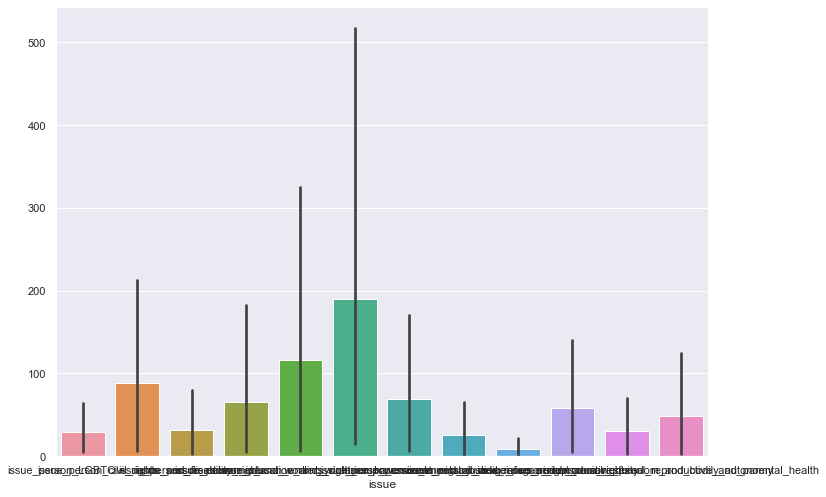

In [135]:
sns.barplot(data = pivot_df)

In [18]:
pivot_df['issue_city_LGBTQI+_rights'].sort_values(ascending = False)[:10].reset_index()

,country_of_residence,issue_city_LGBTQI+_rights
0,Russian Federation,315
1,Switzerland,227
2,United States of America,108
3,Canada,52
4,United Kingdom of Great Britain and Northern I...,42
5,Germany,27
6,Kenya,24
7,Botswana,24
8,Zimbabwe,19
9,Brazil,17


In [41]:
pivot_df['issue_person_ending_violence_harassment_and_abuse'].sort_values(ascending = False)[:10].reset_index()

,country_of_residence,issue_person_ending_violence_harassment_and_abuse
0,Switzerland,1518
1,Belarus,1330
2,Russian Federation,1223
3,Kazakhstan,846
4,Kenya,693
5,Zimbabwe,676
6,Uganda,577
7,Zambia,565
8,Nigeria,562
9,Liberia,523


In [49]:
df[issues_all].sum().sort_values(ascending = False)[:10].reset_index()

,index,0
0,issue_person_ending_violence_harassment_and_abuse,15199
1,issue_person_education_and_youth_empowerment,9307
2,issue_person_civil_rights_and_freedoms,7047
3,issue_person_environmental_justice,5580
4,issue_person_economic_and_workers_rights,5203
5,issue_person_racial_equity,4692
6,issue_city_ending_violence_harassment_and_abuse,4193
7,issue_person_sexual_reproductive_and_parental_...,3864
8,issue_city_education_and_youth_empowerment,3046
9,issue_city_economic_and_workers_rights,3009


In [119]:
test = df[issues_global].sum().to_frame('count').sort_values(by = 'count',ascending = False)

In [94]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [117]:
test.index = ['Violence, Harassment and Abuse', 'Disability Rights', 'Economic Rights', 'Education', 'Violence & Harassment', 'Environmental Justice', 'Immigrant & Refugee Rights', 'Indigenous Rights', 'LGBTQI+ Rights', 'Racial Equity', 'Reproductive Freedom & Bodily Autonomy', 'Reproductive & Parental Health']

In [121]:
test.index = ['Violence, Harassment and Abuse', 'Education and Youth empowerment', 'Civil rights and freedom', 'Environmental Justice', 'Economic and Worker rights', 'Racial Equity', 'Sexual Reproductive and Parental health', 'Disability rights', 'Reproductive freedom and bodily autonomy', 'LGBTQI+ rights', 'Immigrant and refugee rights', 'Indigenous and/ or Roma rights']

<AxesSubplot:xlabel='count'>

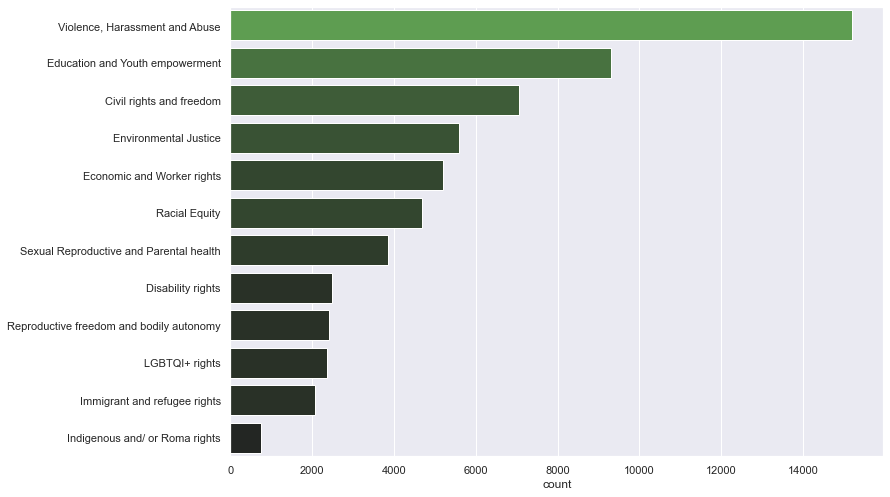

In [127]:
c = colors_from_values(test['count'], "dark:#5A4")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = test, x = 'count', y= test.index, palette = c)
